In [1]:
# Polarization of Ground State of Hydrogen Atom 
# using Finite Differences

In [2]:
%matplotlib inline

In [3]:
# Laplaciano

from numpy import identity 

def Laplacian(x):
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
    M = -2*identity(n,'d')
    for i in range(1,n):
        M[i,i-1] = M[i-1,i] = 1
    return M/h**2

In [4]:

# Normalización de las funciones 

from numpy import sqrt

def Normalizate(U,x):
    
    h = x[1]-x[0] # assume uniformly spaced points
    n = len(x)
        
    for j in range(0,n):
        suma = 0.0
        for i in range(1,n):
             suma = suma + U[i,j]**2

        suma = suma*h
        rnorm = 1/sqrt(suma)
       
#       Normalization
        rsign = 1
        if U[1,j] < 0:
            rsign = -1
            
        rnorm = rnorm * rsign
        for i in range(0,n):
            U[i,j] = U[i,j]*rnorm
         
#       Check Normalization
#        suma = 0.0
#        for i in range(1,n):
#             suma = suma + U[i,j]**2               
#        print j,' suma=',suma*h
       
    return  U

In [5]:
# Definiciones de matrices, vectores, etc.

from numpy import diag,  linspace, array
from numpy.linalg import eigh
from matplotlib.pyplot import axhline, xlabel, ylabel, plot, axis, \
                                figure, title, show

# array definitions
nsize = 2500
xmax=25.0
Dx = (xmax)/nsize
xmin=Dx
x = linspace(xmin,xmax,nsize)
T = array([nsize,nsize])
V = array([nsize,nsize])
H = array([nsize,nsize])
E = array([nsize])



In [6]:
def wavescalc(l):
    
    # Kinetic (T) and Potential (V)
    T = (-0.5)*Laplacian(x)
    V = -1/x + l*(l+1)/(2 * x**2)

    # Hamiltonian
    H =  T + diag(V)

    # Eigenvalues (E) and Eigenvectors (U)
    E,U = eigh(H)

    # Normalization
    U=Normalizate(U,x)

    return U,E

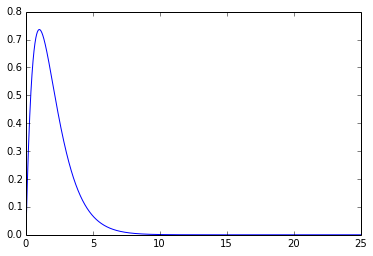

In [7]:
# Cálculo del estado fundamental 1s
U,E = wavescalc(0)
W1s = U[:,0]
E1s = E[0]
plot(x,W1s);

In [8]:
# Cálculo de funciones np
U,E = wavescalc(1)

('E=:', -0.12500016724698601)
('E=:', -0.054912070338821256)
('E=:', -0.016532850076214505)
('E=:', 0.036678029667547157)
('E=:', 0.10799807455732476)


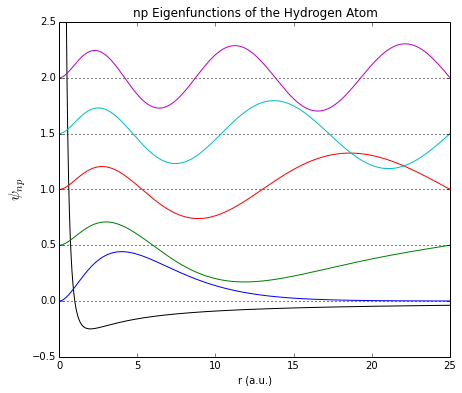

In [13]:
# Ploteo de funciones np

nfunctions = 5

#define plot size in inches (width, height) & resolution(DPI)
fig = figure(figsize=(7, 6), dpi=100)

# Plot the potential
V = -1/x + 1*(1+1)/(2 * x**2)
plot(x,V,color='k')

# Plot wavefunctions
ebase=-0.5
for i in range(nfunctions):
    ebase=ebase+0.5
    # For each of the first few solutions, plot the energy level:
    axhline(y=ebase,color='k',ls=":")
    # as well as the eigenfunction, displaced the function 
    # so they don't all pile up on each other:
    plot(x,U[:,i]+ebase)
    print("E=:",E[i])
axis([xmin,xmax,-0.5,2.5])
title("np Eigenfunctions of the Hydrogen Atom")
xlabel("r (a.u.)")
ylabel("$\psi_{np}$",size=15)
show()


In [14]:
# Cálculo de Polarizabilidad

npts = len(x)
h = x[1]-x[0]

nmax = 20

poltot = 0.0
for n in range(0,nmax):
    sum = 0.0
    for i in range(0,npts):
        sum = sum + W1s[i]*x[i]*U[i,n]
    rnum = (sum * h)**2
    rden = E1s-E[n]
    dipol = (2./3.)*rnum/rden
    poltot = poltot + dipol
    print "n=:",n,"   Polariz (n)=:",dipol,"     Total=:",poltot


n=: 0    Polariz (n)=: -2.95996244098      Total=: -2.95996244098
n=: 1    Polariz (n)=: -0.432013641837      Total=: -3.39197608282
n=: 2    Polariz (n)=: -0.320118964728      Total=: -3.71209504755
n=: 3    Polariz (n)=: -0.280548969397      Total=: -3.99264401694
n=: 4    Polariz (n)=: -0.199771002131      Total=: -4.19241501908
n=: 5    Polariz (n)=: -0.127079006969      Total=: -4.31949402604
n=: 6    Polariz (n)=: -0.076018620462      Total=: -4.39551264651
n=: 7    Polariz (n)=: -0.0440899500142      Total=: -4.43960259652
n=: 8    Polariz (n)=: -0.0252733994476      Total=: -4.46487599597
n=: 9    Polariz (n)=: -0.0144928641892      Total=: -4.47936886016
n=: 10    Polariz (n)=: -0.00837696462938      Total=: -4.48774582479
n=: 11    Polariz (n)=: -0.00490272811319      Total=: -4.4926485529
n=: 12    Polariz (n)=: -0.00291296992988      Total=: -4.49556152283
n=: 13    Polariz (n)=: -0.00175937308632      Total=: -4.49732089592
n=: 14    Polariz (n)=: -0.00108074798539      To